In [1]:
import pandas as pd

In [3]:
file_path = "C:/Users/Manuel/OneDrive/Arbeit/HTWG/Master/results/TabPFN/results_ws10m_ws100m_pt_96.xlsx"
sheets_to_read = ["first_q", "second_q", "third_q", "fourth_q"]

columns_to_keep = ["CRPS Linear", "CRPS Hybrid", "CRPS Normal", "CRPS (5000 quantiles)", 
                   "NLL Linear", "NLL Hybrid", "NLL Normal", "NLL (5000 quantiles)", "y values"]

sheets_dict = pd.read_excel(file_path, sheet_name=sheets_to_read, usecols="A:I")

In [4]:
results = pd.concat([sheets_dict[sheet][columns_to_keep] for sheet in sheets_to_read], ignore_index=True)
results = results.dropna() #because the sheets have additional content in neighboring columns, read_excel() seems to fill these empty rows with NaN

results.describe()

bin_edges = [-10, -6, -5, -4, -3, -2, -1.5, -1, -0.5, 0]  # You can adjust the bins if necessary
bin_labels = [
    "< -6", "(-6, -5)", "(-5, -4)", "(-4, -3)", 
    "(-3, -2)", "(-2, -1.5)", "(-1.5, -1)", "(-1, -0.5)", ">= -0.5"
]

results["y_bin"] = pd.cut(results["y values"], bins=bin_edges, labels=bin_labels, include_lowest=True)

results[results["y_bin"] == "< -6"]

,CRPS Linear,CRPS Hybrid,CRPS Normal,CRPS (5000 quantiles),NLL Linear,NLL Hybrid,NLL Normal,NLL (5000 quantiles),y values,y_bin
1882,1.614916,1.828473,1.816166,1.822870,5.041434,7.049670,22.033536,7.124922,-6.185620,< -6
1883,1.890766,2.169594,2.157370,2.163139,5.040192,7.969739,35.680754,7.195805,-6.562914,< -6
2404,1.831149,1.943812,1.896646,1.907010,5.023250,5.144399,3.583561,4.628606,-6.052089,< -6
2421,2.071892,2.264603,2.291033,2.264621,5.035779,6.324841,13.210095,8.574963,-6.306982,< -6
2427,2.314142,2.576497,2.595616,2.580288,5.063757,6.779761,15.258188,10.001043,-6.306982,< -6
2428,2.405432,2.720970,2.732366,2.716454,5.083584,7.017802,21.753788,10.709135,-6.244461,< -6
2430,2.339333,2.622435,2.655532,2.634171,5.090043,6.439720,25.897056,10.188698,-6.003299,< -6
2431,2.289181,2.577332,2.611278,2.591430,5.091128,6.457132,32.568609,10.326479,-6.027397,< -6
2433,2.425651,2.761761,2.790659,2.770995,5.086776,7.184115,49.724474,11.905008,-6.339772,< -6
2434,2.596357,2.956653,2.984456,2.969614,5.090185,7.396395,41.804184,11.949241,-6.445131,< -6


C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


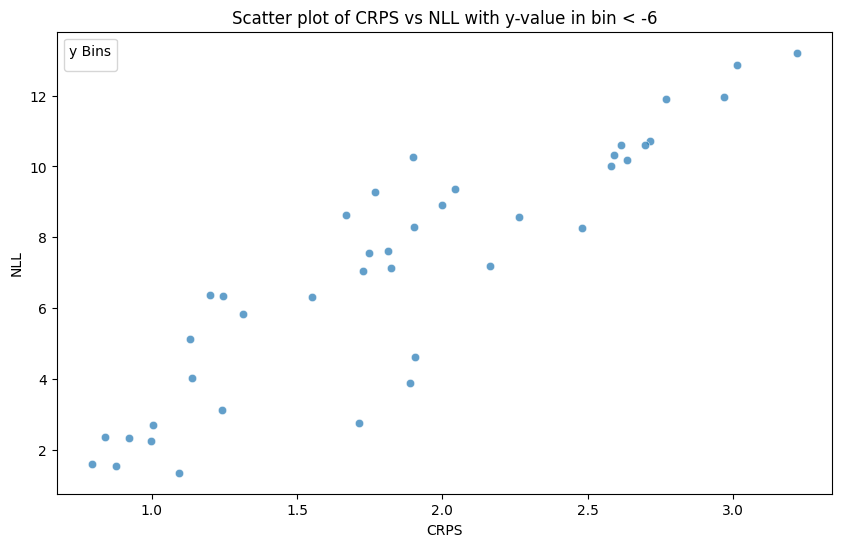

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


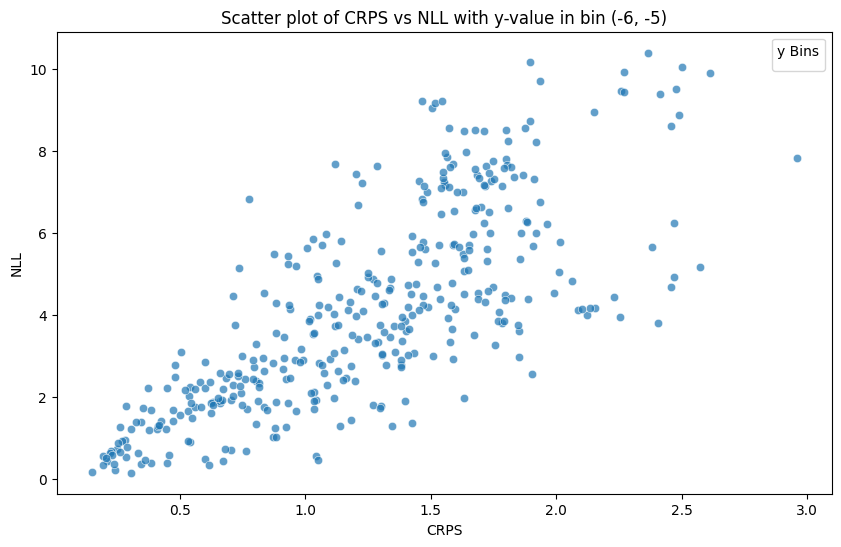

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


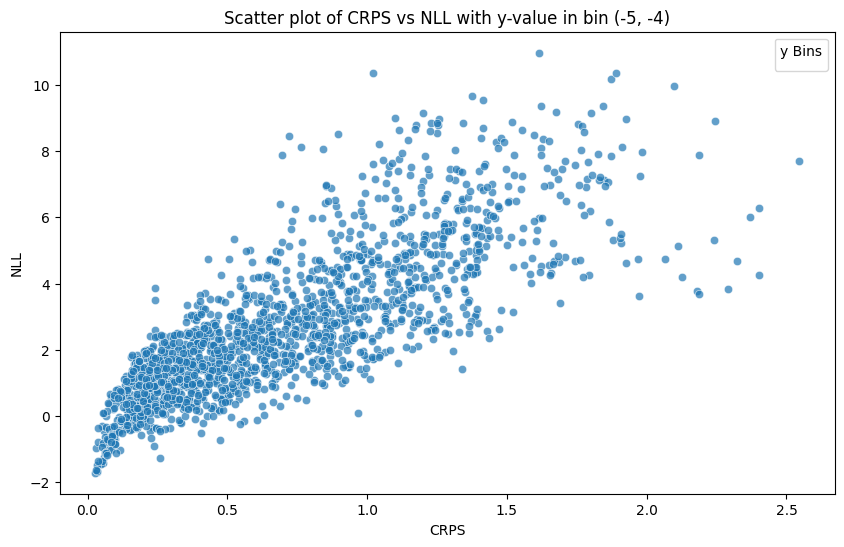

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


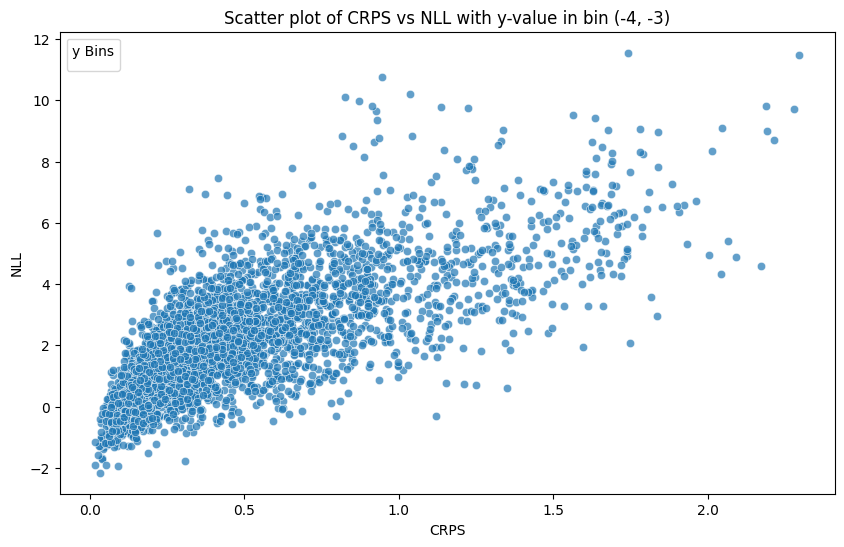

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


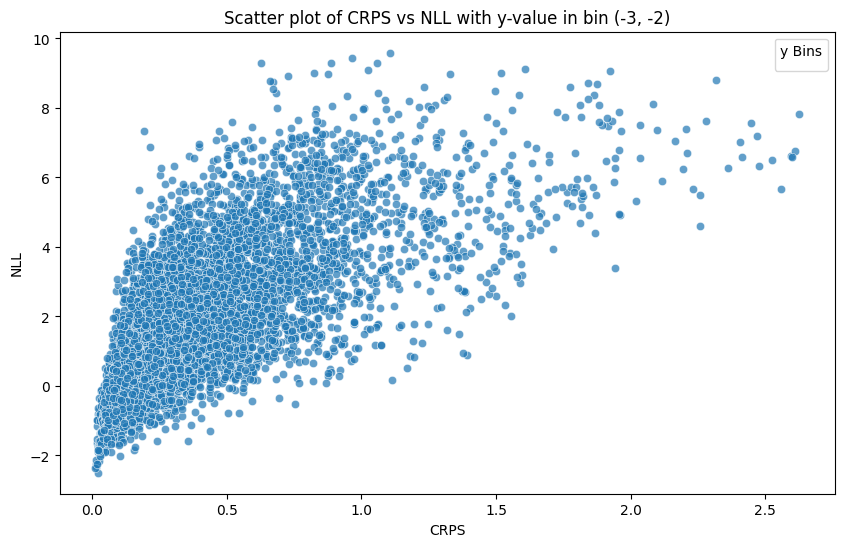

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


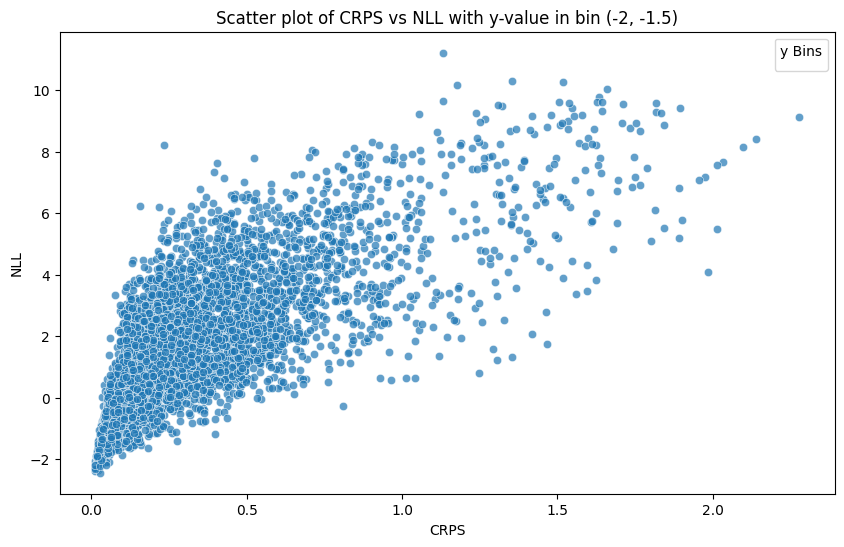

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


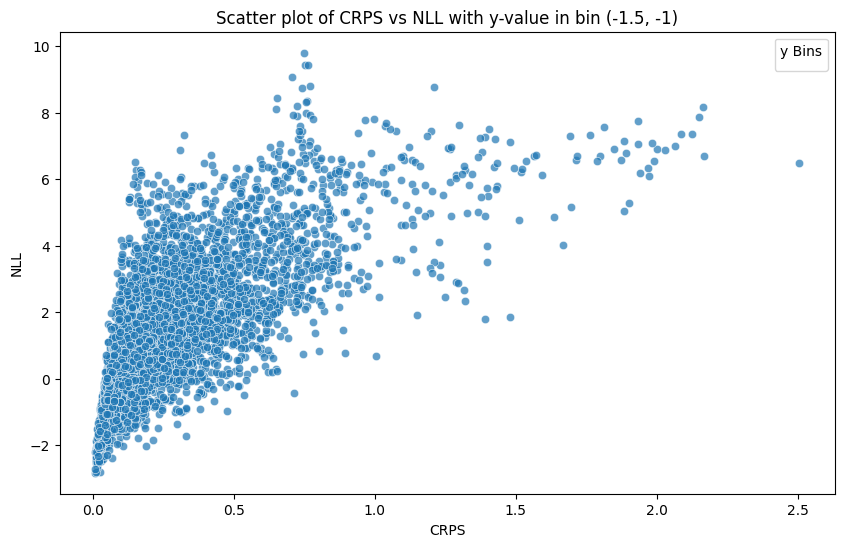

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


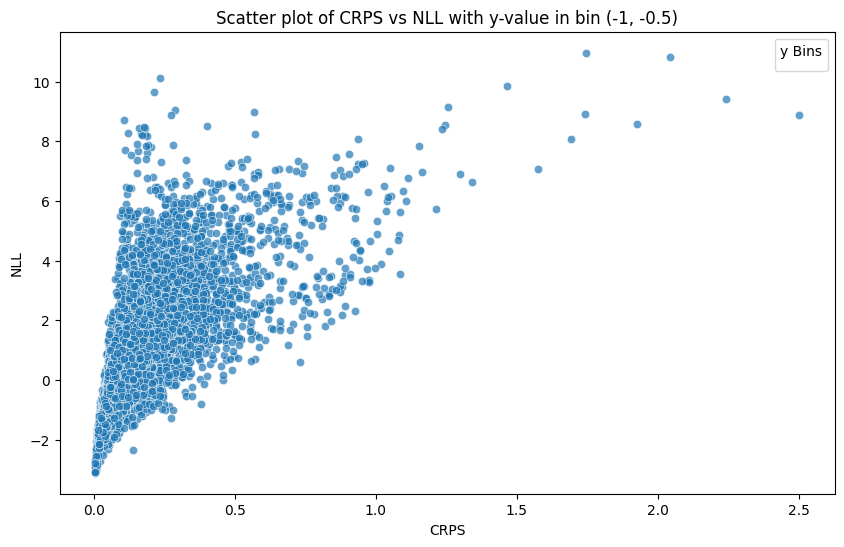

C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)
C:\Users\Manuel\AppData\Local\Temp\ipykernel_4716\1959970492.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="y Bins")


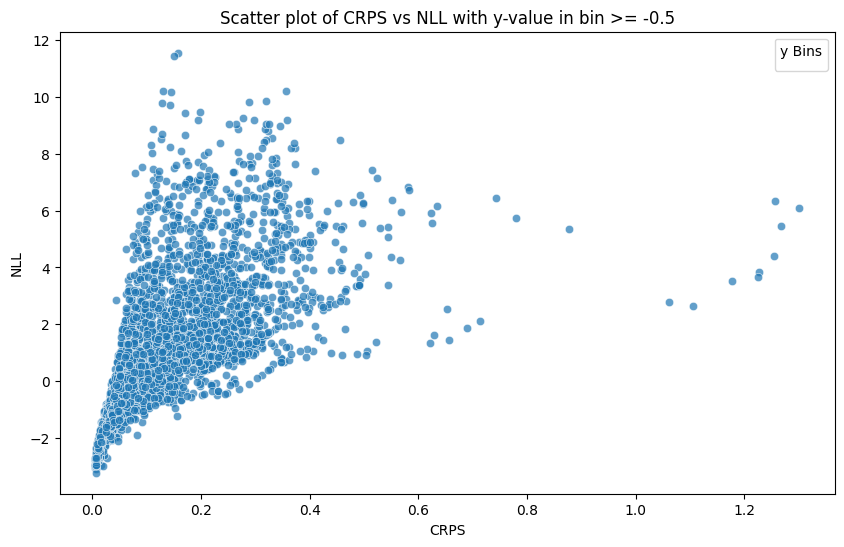

0.7055924847159404

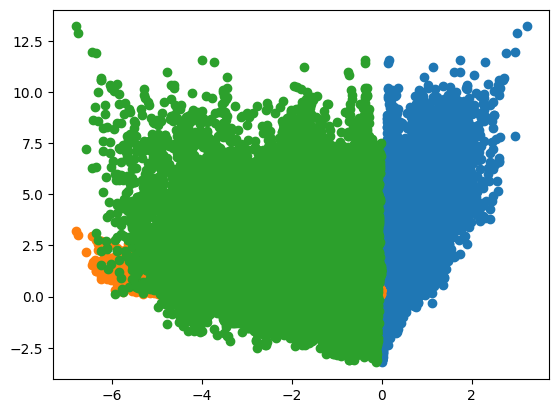

In [ ]:
for i in range(0, len(bin_labels)):

    bin = bin_labels[i]
    results_bin = results[results["y_bin"] == bin]

    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=results_bin["CRPS (5000 quantiles)"], y=results_bin["NLL (5000 quantiles)"], palette="viridis", alpha=0.7)

    # Labels and title
    plt.xlabel("CRPS")
    plt.ylabel("NLL")
    plt.title(f"Scatter plot of CRPS vs NLL with y-value in bin {bin}")
    plt.legend(title="y Bins")

    # Show plot
    plt.show()

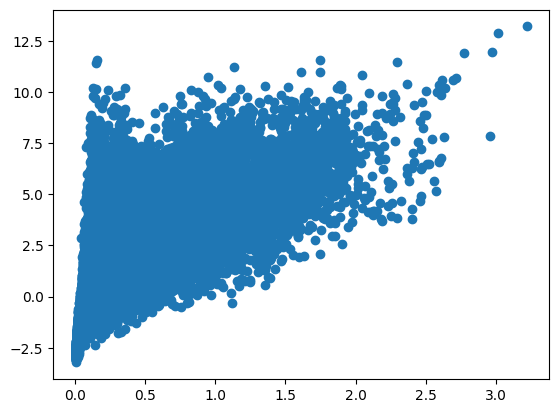

In [6]:
plt.scatter(results["CRPS (5000 quantiles)"], results["NLL (5000 quantiles)"])

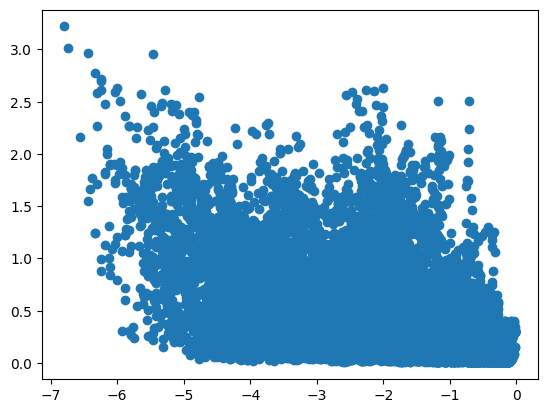

In [7]:
plt.scatter(results["y values"], results["CRPS (5000 quantiles)"])

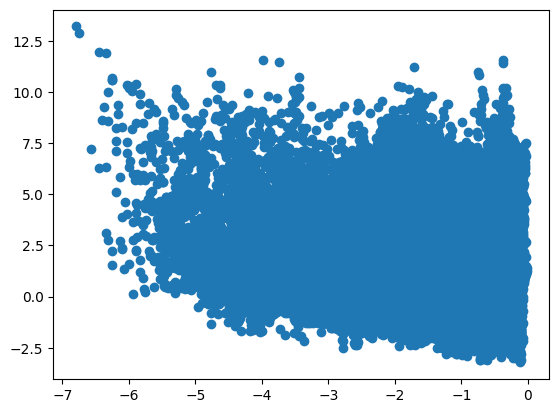

In [8]:
plt.scatter(results["y values"], results["NLL (5000 quantiles)"])

In [9]:
results["y values"].describe()

count    35040.000000
mean        -1.863000
std          1.174718
min         -6.796530
25%         -2.596561
50%         -1.648118
75%         -0.940704
max         -0.018224
Name: y values, dtype: float64

In [10]:
import numpy as np
np.log(1e-4)

results[(results["y values"] < -1.55) & (results["y values"] > -1.58) & (results["NLL (5000 quantiles)"] > 6)]

,CRPS Linear,CRPS Hybrid,CRPS Normal,CRPS (5000 quantiles),NLL Linear,NLL Hybrid,NLL Normal,NLL (5000 quantiles),y values,y_bin
460,0.577696,0.566201,0.580141,0.579964,4.254999,2.989063,15.545518,6.961960,-1.568240,"(-2, -1.5)"
7666,1.443270,1.616771,1.596865,1.634027,4.396274,6.900997,17.388374,9.763720,-1.554226,"(-2, -1.5)"
16235,0.863520,0.854462,0.874973,0.885684,4.273309,2.560494,5.154352,6.322978,-1.564858,"(-2, -1.5)"
16236,0.857365,0.888165,0.900052,0.897113,4.293165,4.001174,10.713370,6.224456,-1.565984,"(-2, -1.5)"
16237,0.811071,0.862399,0.864226,0.865075,4.299358,5.517999,22.053925,6.194545,-1.568522,"(-2, -1.5)"
21723,0.766815,0.789740,0.739910,0.783393,4.272970,5.273041,2.001392,6.039246,-1.561208,"(-2, -1.5)"
27351,1.401440,1.551668,1.581748,1.570448,4.389256,5.988329,112.227402,8.287565,-1.561769,"(-2, -1.5)"
28843,1.633134,1.788548,1.766854,1.817319,4.389185,6.256498,7.094728,9.570024,-1.575889,"(-2, -1.5)"
28844,1.730648,1.884073,1.883281,1.894271,4.391750,6.028814,8.977326,9.411079,-1.565140,"(-2, -1.5)"
28845,1.660303,1.819093,1.804183,1.844979,4.392887,6.149602,7.785744,8.856266,-1.558130,"(-2, -1.5)"


In [11]:
np.corrcoef(results["y values"], results["NLL (5000 quantiles)"])[0,1]

-0.26112354145204497

In [12]:
np.corrcoef(results["y values"], results["CRPS (5000 quantiles)"])[0,1]

-0.4728559127997733

In [14]:
np.corrcoef(results["CRPS (5000 quantiles)"], results["NLL (5000 quantiles)"])[0,1]

0.7055924847159404